# Libraries and Variables

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
print("Libraries Imported")

#Lets import and check the dataset
#Attaching google drive
from google.colab import drive
drive.mount('/content/gdrive')

Libraries Imported
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#File varibles
base_loc = '/content/gdrive/My Drive/upgrad/research/data/'
player_dataset_loc = base_loc + 'player_dataset.csv'
data_loc = base_loc + 'data.csv'
player_summary_loc = base_loc + 'Player_Summaries_2013_1.csv'
gameplay_loc = base_loc + 'games_1_data.csv'
app_id_loc = base_loc + 'App_ID_Info.csv'
achievement_loc = base_loc + 'Achievement_Percentages.csv'
app_id_loc = base_loc + 'app_id_merge.csv'
grouped_loc = base_loc + 'grouped_data.csv'

# EDA

## Basic EDA

In [0]:
#Gameplay data
data = pd.read_csv(player_dataset_loc)
data.sort_values('steamid').head()

,steamid,commentpermission,realname,appid,playtime_2weeks,playtime_forever,unplayed,no_of_games,Genre,free_to_play,Type,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,game_age,no_of_groups,total_group_connections,avg_friend_duration,total_friend_connections,avg_percentage_completion,total_achievements,loggoff_duration,account_age
0,76561197960269425,1.0,1,10,0.0,1304.0,0,222,Action,0.0,game,9.99,88.0,0.0,1.0,0.0,7036.0,12.0,379079.0,432.5,58,13.819854,48.0,61,3524
268,76561197960269425,1.0,1,57700,0.0,19.0,0,222,Action,0.0,game,5.99,76.0,0.0,0.0,0.0,3293.0,12.0,379079.0,432.5,58,11.922427,12.0,61,3524
267,76561197960269425,1.0,1,57690,0.0,1277.0,0,222,Strategy,0.0,game,14.99,78.0,0.0,0.0,0.0,3080.0,12.0,379079.0,432.5,58,13.032787,70.0,61,3524
266,76561197960269425,1.0,1,57690,0.0,1277.0,0,222,Simulation,0.0,game,14.99,78.0,0.0,0.0,0.0,3080.0,12.0,379079.0,432.5,58,13.032787,70.0,61,3524
265,76561197960269425,1.0,1,57680,0.0,0.0,1,222,Adventure,0.0,game,19.99,57.0,0.0,1.0,0.0,3192.0,12.0,379079.0,432.5,58,20.714729,54.0,61,3524


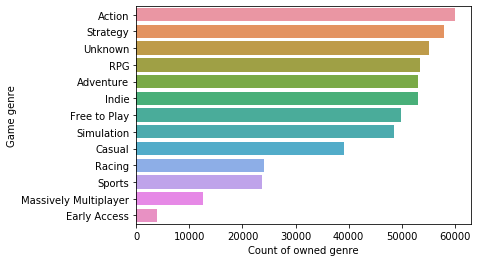

In [0]:
#Lets see which genres are famous
genre_data = data.groupby(['steamid','Genre'],as_index=False).count().reset_index()
genre_data = genre_data.groupby(['Genre'],as_index=False).count().reset_index()[['Genre','index']]
genre_data.columns = ['Game genre', 'Count of owned genre']
genre_data = genre_data.sort_values(by='Count of owned genre',ascending=False)
sns.barplot('Count of owned genre','Game genre', data=genre_data)
#Action is the most famous

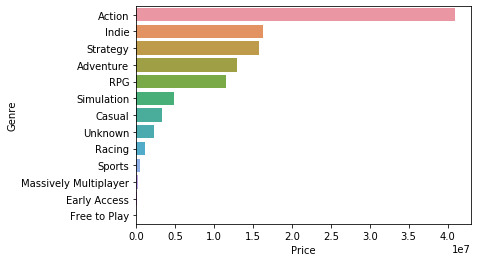

In [0]:
top5 = data[['Price','Genre']].groupby(by='Genre',
                                       as_index=False).agg({'Price':'sum'}).sort_values('Price',
                                                                           ascending=False)
#plt.subplots(figsize=(6,10))
sns.barplot(top5.Price,top5.Genre)

## EDA on the Games

In [0]:
#App id data
app_id = pd.read_csv(app_id_loc)
app_id.head()

,appid,Genre,free_to_play,avg_percentage_completion,total_achievements,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,Is_Adult
0,50,Action,0,0.057843,5,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,74,0,1,0
1,60,Action,0,0.043437,3,Ricochet,game,4.99,2000-11-01 00:00:00,74,0,1,0
2,220,Action,0,17.638451,33,Half-Life 2,game,9.99,2004-11-16 00:00:00,96,0,0,0
3,240,Action,0,16.973004,148,Counter-Strike: Source,game,19.99,2004-11-01 00:00:00,88,0,1,0
4,300,Action,0,5.954849,55,Day of Defeat: Source,game,9.99,2010-07-12 00:00:00,80,0,1,0


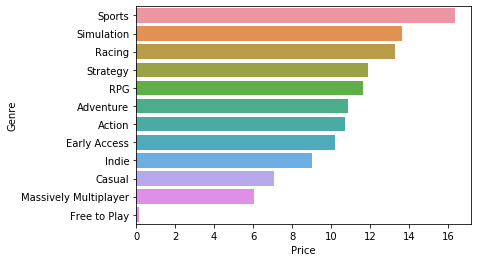

In [0]:
grouped = app_id.loc[:,['Genre','Price']].groupby(by='Genre',
                                                  as_index=False).agg({
                                                      'Price':'mean'}).sort_values('Price',ascending=False)

sns.barplot('Price','Genre',data=grouped)

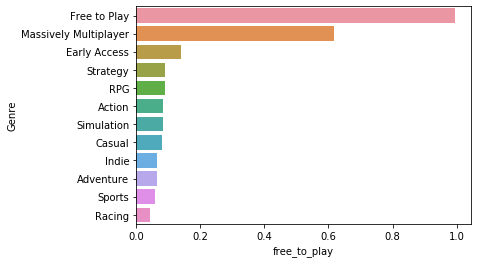

In [0]:
grouped = app_id.loc[:,['Genre','free_to_play']].groupby(by='Genre',
                                                  as_index=False).agg({
                                                      'free_to_play':'mean'}).sort_values(
                                                          'free_to_play',ascending=False)

sns.barplot('free_to_play','Genre',data=grouped)

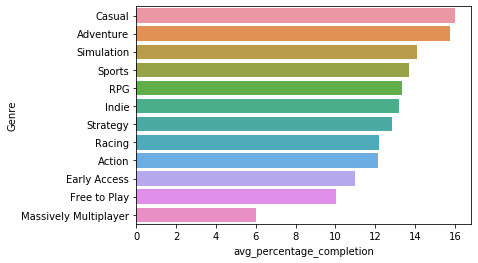

In [0]:
grouped = app_id.loc[:,['Genre','avg_percentage_completion']].groupby(by='Genre',
                                                  as_index=False).agg({
                                                      'avg_percentage_completion':'mean'}).sort_values(
                                                          'avg_percentage_completion',ascending=False)

sns.barplot('avg_percentage_completion','Genre',data=grouped)

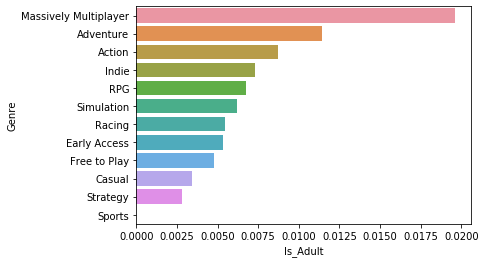

In [0]:
grouped = app_id.loc[:,['Genre','Is_Adult']].groupby(by='Genre',
                                                  as_index=False).agg({
                                                      'Is_Adult':'mean'}).sort_values(
                                                          'Is_Adult',ascending=False)

sns.barplot('Is_Adult','Genre',data=grouped)

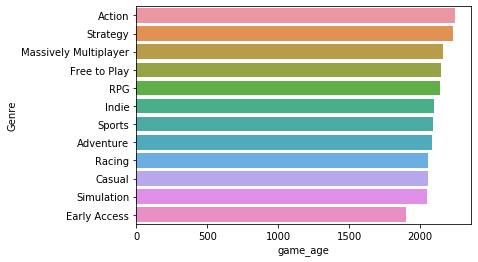

In [0]:
app_id['game_age'] = (pd.to_datetime('today')-pd.to_datetime(app_id.Release_Date)).dt.days


grouped = app_id.loc[:,['Genre','game_age']].groupby(by='Genre',
                                                  as_index=False).agg({
                                                      'game_age':'mean'}).sort_values(
                                                          'game_age',ascending=False)

sns.barplot('game_age','Genre',data=grouped)

## Overall EDA

### Dataset Prep

In [0]:
#Gameplay data
grouped_data = pd.read_csv(grouped_loc)
grouped_data.sort_values('steamid').head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown
0,76561197960269425,1.0,1,5761.0,1408888.0,222,9.0,2375.87,77.747748,3.905405,83.0,1.0,77,3914.536036,12.0,432.500000,13.789975,379079.0,58,11628.0,61,3524,137,39,38,1,3,82,0,33,3,8,4,41,5,3920.0,76.0,1970.0,0.0,0.0,517.0,0.0,76.0,0.0,8,281.0,0.0,0.0,294766.0,79327.0,544768.0,278.0,52567.0,1156112.0,0.0,123538.0,147.0,8,3395.0,75579.0,49.0,0,1,216,0,5
1,76561197960269501,0.0,1,6543.0,170598.0,206,8.0,2641.03,79.228155,4.456311,92.0,1.0,63,3761.116505,28.0,319.717105,13.636806,2723055.0,304,11298.0,61,3524,132,28,26,0,3,73,1,19,4,19,3,49,12,458.0,55.0,0.0,0.0,0.0,293.0,0.0,0.0,0.0,19,0.0,218.0,6032.0,145730.0,15753.0,1608.0,0.0,38495.0,17091.0,22.0,21294.0,736.0,19,24.0,32431.0,13953.0,0,1,191,2,12
2,76561197960269721,0.0,0,19148.0,370321.0,75,5.0,917.30,80.480000,2.480000,38.0,0.0,37,4172.626667,4.0,846.600000,14.620819,5133.0,5,4698.0,80,3524,42,12,2,0,3,14,1,22,0,3,0,20,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0.0,19147.0,0.0,131793.0,26646.0,280.0,0.0,12864.0,33205.0,10841.0,66085.0,0.0,3,0.0,206012.0,15922.0,0,0,72,1,2
3,76561197960269752,0.0,1,8060.0,102719.0,20,2.0,264.82,83.250000,5.100000,14.0,0.0,8,4966.750000,15.0,347.750000,14.846449,286035.0,116,1556.0,81,3524,17,0,0,0,2,0,0,7,0,0,0,1,0,8060.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0,0.0,158.0,0.0,94511.0,0.0,0.0,0.0,37722.0,0.0,0.0,12068.0,0.0,0,0.0,36392.0,0.0,0,0,20,0,0
4,76561197960270225,0.0,1,8833.0,157599.0,187,6.0,1997.19,78.914439,2.989305,75.0,0.0,130,3843.850267,3.0,105.487805,13.244114,795622.0,41,11035.0,80,3524,100,21,17,0,2,43,0,25,3,14,1,41,25,8498.0,0.0,0.0,0.0,4974.0,0.0,0.0,3524.0,0.0,14,0.0,5309.0,0.0,107846.0,6495.0,6148.0,0.0,85593.0,11560.0,0.0,24693.0,132.0,14,0.0,124119.0,4014.0,0,0,161,1,25


In [0]:
grouped_data.isna().sum()

steamid                                           0
commentpermission                                 0
realname                                          0
playtime_2weeks                                   0
playtime_forever                                  0
no_of_games                                       0
free_to_play                                      0
Price                                             0
Rating                                            0
Required_Age                                      0
Is_Multiplayer                                    0
Is_Adult                                          0
unplayed                                          0
game_age                                          0
no_of_groups                                      0
avg_friend_duration                               0
avg_percentage_completion                         0
total_group_connections                           0
total_friend_connections                          0
total_achiev

In [0]:
#Player summary data
player_summary = pd.read_csv(player_summary_loc)
#player_summary.head()
#player_summary = 
player_summary = player_summary.loc[:,['steamid','timecreated']]
player_summary.head()

,steamid,timecreated
0,76561197960266039,2003-09-10 23:48:48
1,76561197960269360,NaN
2,76561197960269424,2003-09-12 00:09:53
3,76561197960269425,2003-09-12 00:18:47
4,76561197960269501,2003-09-12 00:23:37


In [0]:
#gameplay data
gameplay = pd.read_csv(gameplay_loc)
gameplay = gameplay.loc[:,['steamid','dateretrieved']]
gameplay.drop_duplicates(inplace=True)
gameplay.head()

,steamid,dateretrieved
0,76561197960266039,2013-05-06 16:00:46
17,76561197960269360,2013-05-06 02:12:09
56,76561197960269424,2013-05-06 15:59:06
121,76561197960269425,2013-05-06 15:59:30
343,76561197960269501,2013-05-06 15:13:09


In [0]:
#Merge
data = grouped_data.merge(player_summary,how='inner',on='steamid')
data = data.merge(gameplay,how='inner',on='steamid')
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved
0,76561197960269425,1.0,1,5761.0,1408888.0,222,9.0,2375.87,77.747748,3.905405,83.0,1.0,77,3914.536036,12.0,432.500000,13.789975,379079.0,58,11628.0,61,3524,137,39,38,1,3,82,0,33,3,8,4,41,5,3920.0,76.0,1970.0,0.0,0.0,517.0,0.0,76.0,0.0,8,281.0,0.0,0.0,294766.0,79327.0,544768.0,278.0,52567.0,1156112.0,0.0,123538.0,147.0,8,3395.0,75579.0,49.0,0,1,216,0,5,2003-09-12 00:18:47,2013-05-06 15:59:30
1,76561197960269501,0.0,1,6543.0,170598.0,206,8.0,2641.03,79.228155,4.456311,92.0,1.0,63,3761.116505,28.0,319.717105,13.636806,2723055.0,304,11298.0,61,3524,132,28,26,0,3,73,1,19,4,19,3,49,12,458.0,55.0,0.0,0.0,0.0,293.0,0.0,0.0,0.0,19,0.0,218.0,6032.0,145730.0,15753.0,1608.0,0.0,38495.0,17091.0,22.0,21294.0,736.0,19,24.0,32431.0,13953.0,0,1,191,2,12,2003-09-12 00:23:37,2013-05-06 15:13:09
2,76561197960269721,0.0,0,19148.0,370321.0,75,5.0,917.30,80.480000,2.480000,38.0,0.0,37,4172.626667,4.0,846.600000,14.620819,5133.0,5,4698.0,80,3524,42,12,2,0,3,14,1,22,0,3,0,20,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0.0,19147.0,0.0,131793.0,26646.0,280.0,0.0,12864.0,33205.0,10841.0,66085.0,0.0,3,0.0,206012.0,15922.0,0,0,72,1,2,2003-09-12 00:33:28,2013-05-06 15:13:30
3,76561197960269752,0.0,1,8060.0,102719.0,20,2.0,264.82,83.250000,5.100000,14.0,0.0,8,4966.750000,15.0,347.750000,14.846449,286035.0,116,1556.0,81,3524,17,0,0,0,2,0,0,7,0,0,0,1,0,8060.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0,0.0,158.0,0.0,94511.0,0.0,0.0,0.0,37722.0,0.0,0.0,12068.0,0.0,0,0.0,36392.0,0.0,0,0,20,0,0,2003-09-12 00:31:36,2013-05-06 15:16:16
4,76561197960270225,0.0,1,8833.0,157599.0,187,6.0,1997.19,78.914439,2.989305,75.0,0.0,130,3843.850267,3.0,105.487805,13.244114,795622.0,41,11035.0,80,3524,100,21,17,0,2,43,0,25,3,14,1,41,25,8498.0,0.0,0.0,0.0,4974.0,0.0,0.0,3524.0,0.0,14,0.0,5309.0,0.0,107846.0,6495.0,6148.0,0.0,85593.0,11560.0,0.0,24693.0,132.0,14,0.0,124119.0,4014.0,0,0,161,1,25,2003-09-12 00:43:52,2013-05-06 16:00:52


In [0]:
#Get new Playtime age since Steam began tracking total playtime in early 2009.
#So some averages will be from 2009 else timecreated

data.timecreated = data.timecreated.apply(
    lambda x: pd.to_datetime(x) 
    if pd.to_datetime(x)>=pd.to_datetime('2009-01-01') else pd.to_datetime('2009-01-01')
     )

data['playtime_age'] = (pd.to_datetime(data.dateretrieved)-pd.to_datetime(data.timecreated)).dt.days
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age
0,76561197960269425,1.0,1,5761.0,1408888.0,222,9.0,2375.87,77.747748,3.905405,83.0,1.0,77,3914.536036,12.0,432.500000,13.789975,379079.0,58,11628.0,61,3524,137,39,38,1,3,82,0,33,3,8,4,41,5,3920.0,76.0,1970.0,0.0,0.0,517.0,0.0,76.0,0.0,8,281.0,0.0,0.0,294766.0,79327.0,544768.0,278.0,52567.0,1156112.0,0.0,123538.0,147.0,8,3395.0,75579.0,49.0,0,1,216,0,5,2009-01-01,2013-05-06 15:59:30,1586
1,76561197960269501,0.0,1,6543.0,170598.0,206,8.0,2641.03,79.228155,4.456311,92.0,1.0,63,3761.116505,28.0,319.717105,13.636806,2723055.0,304,11298.0,61,3524,132,28,26,0,3,73,1,19,4,19,3,49,12,458.0,55.0,0.0,0.0,0.0,293.0,0.0,0.0,0.0,19,0.0,218.0,6032.0,145730.0,15753.0,1608.0,0.0,38495.0,17091.0,22.0,21294.0,736.0,19,24.0,32431.0,13953.0,0,1,191,2,12,2009-01-01,2013-05-06 15:13:09,1586
2,76561197960269721,0.0,0,19148.0,370321.0,75,5.0,917.30,80.480000,2.480000,38.0,0.0,37,4172.626667,4.0,846.600000,14.620819,5133.0,5,4698.0,80,3524,42,12,2,0,3,14,1,22,0,3,0,20,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0.0,19147.0,0.0,131793.0,26646.0,280.0,0.0,12864.0,33205.0,10841.0,66085.0,0.0,3,0.0,206012.0,15922.0,0,0,72,1,2,2009-01-01,2013-05-06 15:13:30,1586
3,76561197960269752,0.0,1,8060.0,102719.0,20,2.0,264.82,83.250000,5.100000,14.0,0.0,8,4966.750000,15.0,347.750000,14.846449,286035.0,116,1556.0,81,3524,17,0,0,0,2,0,0,7,0,0,0,1,0,8060.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0,0.0,158.0,0.0,94511.0,0.0,0.0,0.0,37722.0,0.0,0.0,12068.0,0.0,0,0.0,36392.0,0.0,0,0,20,0,0,2009-01-01,2013-05-06 15:16:16,1586
4,76561197960270225,0.0,1,8833.0,157599.0,187,6.0,1997.19,78.914439,2.989305,75.0,0.0,130,3843.850267,3.0,105.487805,13.244114,795622.0,41,11035.0,80,3524,100,21,17,0,2,43,0,25,3,14,1,41,25,8498.0,0.0,0.0,0.0,4974.0,0.0,0.0,3524.0,0.0,14,0.0,5309.0,0.0,107846.0,6495.0,6148.0,0.0,85593.0,11560.0,0.0,24693.0,132.0,14,0.0,124119.0,4014.0,0,0,161,1,25,2009-01-01,2013-05-06 16:00:52,1586


In [0]:
'''
#Getting aggrevated totals
data['Playtime_forever_total'] = data.Playtime_forever_bygenre_Action+data.Playtime_forever_bygenre_Adventure+data.Playtime_forever_bygenre_Casual+data.Playtime_forever_bygenre_Early+data.Playtime_forever_bygenre_Free+data.Playtime_forever_bygenre_Indie+data.Playtime_forever_bygenre_Massively_Multiplayer+data.Playtime_forever_bygenre_RPG+data.Playtime_forever_bygenre_Racing+data.Playtime_forever_bygenre_Simulation+data.Playtime_forever_bygenre_Sports+data.Playtime_forever_bygenre_Strategy+data.Playtime_forever_bygenre_Unknown

data['Playtime_2weeks_total'] = data.Playtime_2weeks_bygenre_Action+data.Playtime_2weeks_bygenre_Adventure+data.Playtime_2weeks_bygenre_Casual+data.Playtime_2weeks_bygenre_Early+data.Playtime_2weeks_bygenre_Free+data.Playtime_2weeks_bygenre_Indie+data.Playtime_2weeks_bygenre_Massively_Multiplayer+data.Playtime_2weeks_bygenre_RPG+data.Playtime_2weeks_bygenre_Racing+data.Playtime_2weeks_bygenre_Simulation+data.Playtime_2weeks_bygenre_Sports+data.Playtime_2weeks_bygenre_Strategy+data.Playtime_2weeks_bygenre_Unknown

data['Genre_total'] = data.Genre_Action+data.Genre_Adventure+data.Genre_Casual+data.Genre_Early+data.Genre_Free+data.Genre_Indie+data.Genre_Massively_Multiplayer+data.Genre_RPG+data.Genre_Racing+data.Genre_Simulation+data.Genre_Sports+data.Genre_Strategy+data.Genre_Unknown
'''

"\n#Getting aggrevated totals\ndata['Playtime_forever_total'] = data.Playtime_forever_bygenre_Action+data.Playtime_forever_bygenre_Adventure+data.Playtime_forever_bygenre_Casual+data.Playtime_forever_bygenre_Early+data.Playtime_forever_bygenre_Free+data.Playtime_forever_bygenre_Indie+data.Playtime_forever_bygenre_Massively_Multiplayer+data.Playtime_forever_bygenre_RPG+data.Playtime_forever_bygenre_Racing+data.Playtime_forever_bygenre_Simulation+data.Playtime_forever_bygenre_Sports+data.Playtime_forever_bygenre_Strategy+data.Playtime_forever_bygenre_Unknown\n\ndata['Playtime_2weeks_total'] = data.Playtime_2weeks_bygenre_Action+data.Playtime_2weeks_bygenre_Adventure+data.Playtime_2weeks_bygenre_Casual+data.Playtime_2weeks_bygenre_Early+data.Playtime_2weeks_bygenre_Free+data.Playtime_2weeks_bygenre_Indie+data.Playtime_2weeks_bygenre_Massively_Multiplayer+data.Playtime_2weeks_bygenre_RPG+data.Playtime_2weeks_bygenre_Racing+data.Playtime_2weeks_bygenre_Simulation+data.Playtime_2weeks_bygenr

In [0]:
#New features
data['forever_avg'] = data.playtime_forever/data.playtime_age
data['daily_monetary'] = data.Price/data.playtime_age

data['achievement_per_game'] = data.total_achievements/data.no_of_games
data['freetoplay_percentage'] = data.free_to_play/data.no_of_games
data['multiplayer_percentage'] = data.Is_Multiplayer/data.no_of_games
data['adult_percentage'] = data.Is_Adult/data.no_of_games
data['unplayed_percentage'] = data.unplayed/data.no_of_games

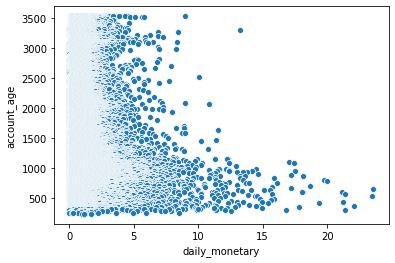

In [0]:
sns.scatterplot(data.daily_monetary,data.account_age)

### EDA

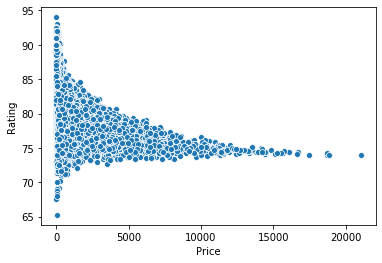

In [0]:
#Overall spend vs Ratings of games
sns.scatterplot('Price','Rating',data=data)

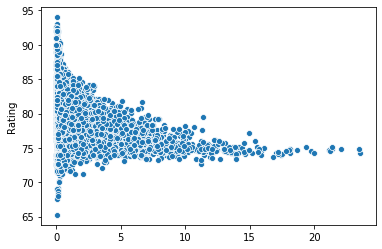

In [0]:
#Daily spend vs Ratings of games
sns.scatterplot(data.Price/data.account_age,data.Rating)

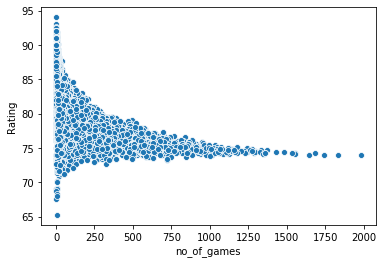

In [0]:
#Overall spend vs Ratings of games
sns.scatterplot('no_of_games','Rating',data=data)

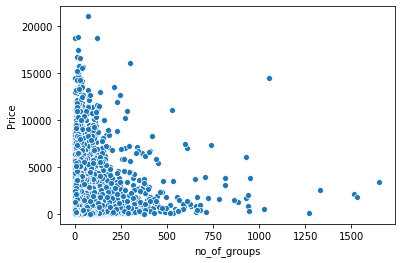

In [0]:
#Overall spend vs no of games
sns.scatterplot('no_of_groups','Price',data=data)

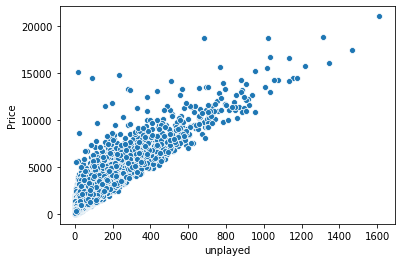

In [0]:
#Overall spend vs no of games
sns.scatterplot('unplayed','Price',data=data)

# DATA PROFILING

## 1 . Player with High and low Daily monetary spend


In [0]:
data['Price'].quantile(np.arange(0,1.1,0.1))

#data[data.Price>15000].head()
#data[data.Price<300].head()
#Picking 76561197960275312,76561197960269752

data[data.steamid.isin(['76561197960275312','76561197960269752'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
3,76561197960269752,0.0,1,8060.0,102719.0,20,2.0,264.82,83.250000,5.100000,14.0,0.0,8,4966.750000,15.0,347.750000,14.846449,286035.0,116,1556.0,81,3524,17,0,0,0,2,0,0,7,0,0,0,1,0,8060.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0,0.0,158.0,0.0,94511.0,0.0,0.0,0.0,37722.0,0.0,0.0,12068.0,0.0,0,0.0,36392.0,0.0,0,0,20,0,0,2009-01-01,2013-05-06 15:16:16,1586,64.766078,0.166974,77.800000,0.100000,0.700000,0.000000,0.400000
17,76561197960275312,0.0,0,5947.0,196950.0,1288,19.0,14259.77,74.390528,1.923913,385.0,7.0,1075,3462.796584,5.0,415.272727,13.854255,10852.0,11,60829.0,80,3524,469,238,197,2,5,308,3,131,57,109,25,260,212,5769.0,5506.0,100.0,0.0,0.0,260.0,0.0,103.0,13.0,109,100.0,110.0,78.0,129908.0,13359.0,20399.0,41.0,3069.0,10731.0,3033.0,74250.0,1399.0,109,913.0,23089.0,4314.0,0,8,1078,0,202,2009-01-01,2013-05-06 15:26:18,1586,124.180328,8.991028,47.227484,0.014752,0.298913,0.005435,0.834627


## 2 . Player with High and low Daily playtime average

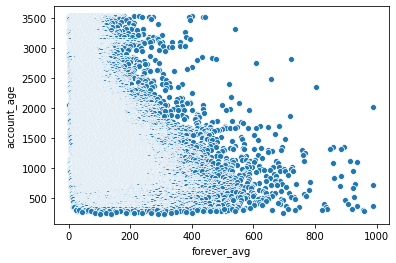

In [0]:
data['forever_avg'] = data.playtime_forever/data.account_age

data['forever_avg'].quantile(np.arange(0,1.1,0.1))
data['account_age'].quantile(np.arange(0,1.1,0.1))

#sns.scatterplot('forever_avg','account_age',data=data)
#Outliers messing it up
data[data.forever_avg<1000].count()[0]*100/data.count()[0]
data[['forever_avg','account_age']].corr() #-0.3
sns.scatterplot('forever_avg','account_age',data=data[data.forever_avg<1000])

In [0]:
#data[(data.forever_avg>235) & (data.account_age>1000)].head()
#data[(data.forever_avg<33) & (data.account_age>2000)].head()
#Picking 76561197960269425, 76561197960269752

data[data.steamid.isin(['76561197960269425','76561197960269752'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
0,76561197960269425,1.0,1,5761.0,1408888.0,222,9.0,2375.87,77.747748,3.905405,83.0,1.0,77,3914.536036,12.0,432.50,13.789975,379079.0,58,11628.0,61,3524,137,39,38,1,3,82,0,33,3,8,4,41,5,3920.0,76.0,1970.0,0.0,0.0,517.0,0.0,76.0,0.0,8,281.0,0.0,0.0,294766.0,79327.0,544768.0,278.0,52567.0,1156112.0,0.0,123538.0,147.0,8,3395.0,75579.0,49.0,0,1,216,0,5,2009-01-01,2013-05-06 15:59:30,1586,399.797957,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847
3,76561197960269752,0.0,1,8060.0,102719.0,20,2.0,264.82,83.250000,5.100000,14.0,0.0,8,4966.750000,15.0,347.75,14.846449,286035.0,116,1556.0,81,3524,17,0,0,0,2,0,0,7,0,0,0,1,0,8060.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0,0.0,158.0,0.0,94511.0,0.0,0.0,0.0,37722.0,0.0,0.0,12068.0,0.0,0,0.0,36392.0,0.0,0,0,20,0,0,2009-01-01,2013-05-06 15:16:16,1586,29.148411,0.166974,77.800000,0.100000,0.700000,0.000000,0.400000


## 3 . Player with High and low unplayed percentage

In [0]:
data['unplayed_percentage'] = data.unplayed/data.no_of_games

data['unplayed_percentage'].quantile(np.arange(0,1.1,0.1))  #0.13 and 0.5
data['no_of_games'].quantile(np.arange(0,1.1,0.1)) #Picking 43

data[(data.unplayed_percentage<0.13) & (data.no_of_games>43)].head()
data[(data.unplayed_percentage>0.5) & (data.no_of_games>43)].head()
#76561197961805932 and 76561197960270328

data[data.steamid.isin(['76561197961805932','76561197960270328'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
5,76561197960270328,1.0,0,12169.0,226180.0,181,5.0,2293.74,76.624309,3.104972,70.0,1.0,163,3947.138122,2.0,113.39749,13.726427,90473.0,239,9944.0,80,3524,82,24,16,0,2,18,0,14,7,11,1,46,17,12169.0,0.0,0.0,0.0,967.0,0.0,0.0,0.0,0.0,11,0.0,962.0,0.0,225007.0,271.0,0.0,0.0,12877.0,0.0,0.0,198.0,538.0,11,0.0,4282.0,403.0,0,0,164,0,17,2009-01-01,2013-05-06 16:35:55,1586,64.182747,1.446242,54.939227,0.027624,0.386740,0.005525,0.900552
856,76561197961805932,0.0,1,6480.0,336670.0,240,6.0,3339.67,78.108333,5.666667,89.0,1.0,30,3683.741667,27.0,420.34375,14.868658,2834627.0,32,12692.0,80,3501,156,63,8,0,1,41,0,31,8,7,3,21,33,6206.0,2317.0,27.0,0.0,0.0,1255.0,0.0,2199.0,47.0,7,47.0,269.0,147.0,193205.0,85573.0,5699.0,0.0,72.0,54430.0,0.0,60354.0,16460.0,7,7820.0,24248.0,38493.0,0,1,207,0,32,2009-01-01,2013-05-07 21:00:56,1587,96.163953,2.104392,52.883333,0.025000,0.370833,0.004167,0.125000


## 4 . Player with good and bad social connections (groups and friends)



In [0]:
data['avg_friend_duration'].quantile(np.arange(0,1.1,0.1)) #150 and 500
data['no_of_groups'].quantile(np.arange(0,1.1,0.1)) #2 and 20

data['total_group_connections'].quantile(np.arange(0,1.1,0.1)) #2972840 and 374.0
data['total_friend_connections'].quantile(np.arange(0,1.1,0.1)) # 6 and 414

#data[(data.avg_friend_duration<150) & (data.no_of_groups<2)].head()
#data[(data.avg_friend_duration>500) & (data.no_of_groups>20)].head()
#76561197960327533 , 76561197960278199

data[(data.total_group_connections<374) & (data.total_friend_connections<6)].head()
#data[(data.total_group_connections>2972840) & (data.total_friend_connections>414)].head()
#76561197964472214 , 76561197960344543

data[data.steamid.isin(['76561197964472214','76561197960344543'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
98,76561197960344543,1.0,1,8763.0,102627.0,353,12.0,4495.60,76.747875,3.951841,154.0,2.0,199,3590.416431,302.0,410.359116,13.871345,5969826.0,362,17331.0,80,3524,207,63,34,0,6,117,0,37,13,18,11,74,30,8071.0,56.0,218.0,0.0,5516.0,7.0,0.0,2099.0,0.0,18,218.0,110.0,364.0,94234.0,8177.0,2120.0,0.0,32940.0,9329.0,0.0,11730.0,854.0,18,2834.0,9001.0,4267.0,1,3,321,1,27,2009-01-01,2013-05-06 17:24:01,1586,29.122304,2.834552,49.096317,0.033994,0.436261,0.005666,0.563739
1621,76561197964472214,0.0,0,5504.0,178080.0,215,3.0,2627.88,78.879070,4.986047,85.0,2.0,92,3967.972093,1.0,267.600000,13.959018,120.0,5,12458.0,82,3371,112,33,5,0,1,37,0,48,0,28,2,71,14,2971.0,1407.0,0.0,0.0,0.0,1943.0,0.0,1769.0,0.0,28,0.0,1648.0,0.0,88033.0,9129.0,1779.0,0.0,6838.0,33729.0,0.0,78221.0,0.0,28,60.0,36868.0,23117.0,0,4,197,0,14,2009-01-01,2013-05-09 13:14:22,1589,52.827054,1.653795,57.944186,0.013953,0.395349,0.009302,0.427907


## 5 . Players who have free to play games

In [0]:
data['freetoplay_percentage'] = data.free_to_play/data.no_of_games

data['freetoplay_percentage'].quantile(np.arange(0,1.1,0.1))

#data[(data.freetoplay_percentage>0.1)].head() #Looks like no of games are low for these people

data[(data.freetoplay_percentage>0.1)]['no_of_games'].quantile(np.arange(0,1.1,0.1))

#data[(data.freetoplay_percentage>0.1) & (data.no_of_games>24)].head()

0.0      1.0
0.1      4.0
0.2      6.0
0.3      8.0
0.4     11.0
0.5     15.0
0.6     18.0
0.7     24.0
0.8     30.0
0.9     41.0
1.0    180.0
Name: no_of_games, dtype: float64

# Outliers

## Outlier Checks

In [0]:
#Outliers decisions

#commentpermission
#data['commentpermission'].quantile(np.arange(0,1.1,0.1)) #not needed
#realname
#data['realname'].quantile(np.arange(0,1.1,0.1)) #Ok may not need , unsure

#Playtime 2 weeks
#data['playtime_2weeks'].quantile(np.arange(0,1.1,0.1))
#Cap at 9714 ceiling
#Over 11 hours in a day for 2 weeks

#Playtime forever
#data['playtime_forever'].quantile(np.arange(0,1.1,0.1))
#Not needed Account age and forever average is a better attribute

#No of games
#data['no_of_games'].quantile(np.arange(0,1.1,0.1))
#185 ceiling

#No of games
#data['free_to_play'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['freetoplay_percentage'].quantile(np.arange(0,1.1,0.1))
#0.1 ceiling

#Monetary spend
#data['Price'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['daily_monetary'].quantile(np.arange(0,1.1,0.1))
#2.15 ceiling

#Rating
#data['Rating'].quantile(np.arange(0,1.1,0.1))
#ok

#Required_Age
#data['Required_Age'].quantile(np.arange(0,1.1,0.1))
#7 ceiling but cant do that since adult games will be gone

#Is_Adult
#data['adult_percentage'].quantile(np.arange(0,1.1,0.1))
#0.02 ceiling

#Is_Multiplayer
#data['multiplayer_percentage'].quantile(np.arange(0,1.1,0.1))
#Looks ok

#game_age
#data['game_age'].quantile(np.arange(0,1.1,0.1))
#4231 ceiling

#no_of_groups	
#data['no_of_groups'].quantile(np.arange(0,1.1,0.1)) 
#31 ceiling

#no_of_groups	
#data['avg_friend_duration'].quantile(np.arange(0,1.1,0.1))
#690 ceiling

#avg_percentage_completion	
#data['avg_percentage_completion'].quantile(np.arange(0,1.1,0.1))
#10.8 ceiling

#total_achievements
#data['total_achievements'].quantile(np.arange(0,1.1,0.1)) #Not needed

#loggoff_duration
#data['loggoff_duration'].quantile(np.arange(0,1.1,0.1))
#171.0 ceiling

#avg_percentage_completion
#data['avg_percentage_completion'].quantile(np.arange(0,1.1,0.1))
#10.0 ceiling

#account_age
#data['account_age'].quantile(np.arange(0,1.1,0.1))
#OK

#forever_avg
#data['forever_avg'].quantile(np.arange(0,1.1,0.1))
#Need to filter

#data['unplayed_percentage'].quantile(np.arange(0,1.1,0.1)) 
#0.57 ceiling

#Type_demo					
#data['Type_demo'].quantile(np.arange(0,1.1,0.1)) #Not needed
#Type_dlc
#data['Type_dlc'].quantile(np.arange(0,1.1,0.1)) #Not needed
#Type_dlc
#data['Type_game'].quantile(np.arange(0,1.1,0.1)) #Ceiling 168.0
#Type_dlc
#data['Type_mod'].quantile(np.arange(0,1.1,0.1)) #Ceiling 1
#Type_dlc
#data['Type_Unknown'].quantile(np.arange(0,1.1,0.1)) #Ceiling 16

#Types are not needed

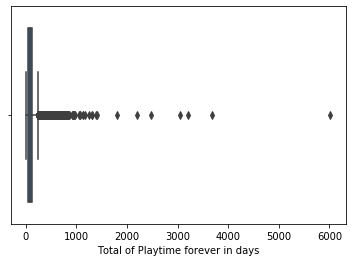

In [0]:
#Need to only take the subset of players who are not just addicted for 2 weeks
ax = sns.boxplot(data.playtime_forever/(24*60))
ax.set(xlabel='Total of Playtime forever in days')
plt.show()
#data['account_age'].quantile(np.arange(0,1.1,0.1))

In [0]:
data[data.playtime_forever/(24*60)>1000][['account_age','playtime_forever']].head()

,account_age,playtime_forever
451,3520,1536403.0
590,3517,1556386.0
1989,3307,1790534.0
6095,2811,2034246.0
6153,2799,4381454.0


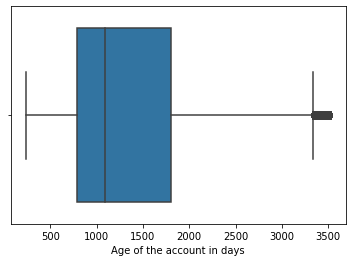

In [0]:
ax = sns.boxplot(data.account_age)
ax.set(xlabel='Age of the account in days')
plt.show()

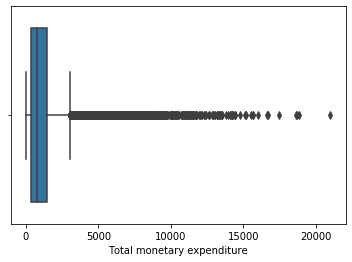

In [0]:
ax = sns.boxplot(data.Price)
ax.set(xlabel='Total monetary expenditure')
plt.show()

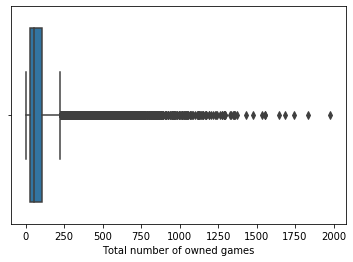

In [56]:
ax = sns.boxplot(data.no_of_games)
ax.set(xlabel='Total number of owned games')
plt.show()

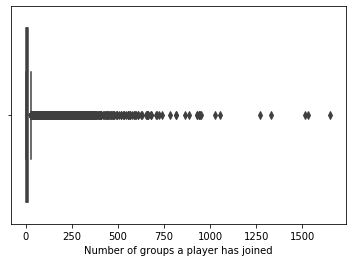

In [0]:
ax = sns.boxplot(data.no_of_groups)
ax.set(xlabel='Number of groups a player has joined')
plt.show()

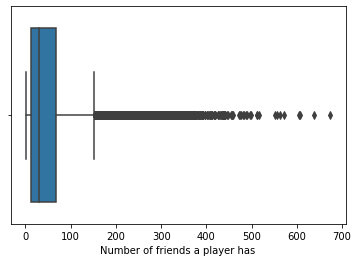

In [0]:
ax = sns.boxplot(data.total_friend_connections)
ax.set(xlabel='Number of friends a player has')
plt.show()

In [0]:
#data[data.total_friend_connections>250].count()

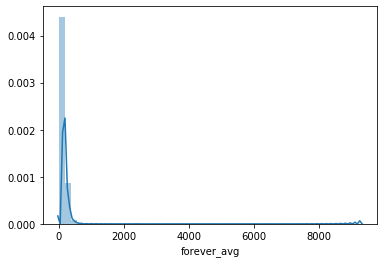

In [0]:
#sns.distplot(data.forever_avg)
data['account_age'].quantile(np.arange(0,1.1,0.1))
data['forever_avg'].quantile(np.arange(0,1.1,0.1))

data[(data.account_age<600) & (data.account_age>50)].head()

#data.forever_avg = data.forever_avg.apply(lambda x: 235 if x>235 else x)
#data.forever_avg = data.forever_avg.apply(lambda x: 33 if x<33 else x)
sns.distplot(data.forever_avg)

In [0]:
#Genre Numbers
#data['Genre_Action'].quantile(np.arange(0,1.1,0.1)) #Ok
#data['Genre_Adventure'].quantile(np.arange(0,1.1,0.1)) #0.27
#data['Genre_Casual'].quantile(np.arange(0,1.1,0.1)) #0.12
#data['Genre_Early'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Genre_Indie'].quantile(np.arange(0,1.1,0.1)) #0.41
#data['Genre_Massively_Multiplayer'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Genre_RPG'].quantile(np.arange(0,1.1,0.1)) #0.28
#data['Genre_Racing'].quantile(np.arange(0,1.1,0.1)) #0.03
#data['Genre_Simulation'].quantile(np.arange(0,1.1,0.1)) #0.15
#data['Genre_Sports'].quantile(np.arange(0,1.1,0.1)) #0.3
#data['Genre_Strategy'].quantile(np.arange(0,1.1,0.1)) #0.4
#data['Genre_Unknown'].quantile(np.arange(0,1.1,0.1)) #0.15

In [0]:
#data['Playtime_2weeks_bygenre_Action'].quantile(np.arange(0,1.1,0.1)) #floor 0.01
#data['Playtime_2weeks_bygenre_Adventure'].quantile(np.arange(0,1.1,0.1)) #0.04
#data['Playtime_2weeks_bygenre_Casual'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_2weeks_bygenre_Early'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_2weeks_bygenre_Indie'].quantile(np.arange(0,1.1,0.1)) #0.1
#data['Playtime_2weeks_bygenre_Massively_Multiplayer'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_2weeks_bygenre_RPG'].quantile(np.arange(0,1.1,0.1)) #0.50
#data['Playtime_2weeks_bygenre_Racing'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_2weeks_bygenre_Simulation'].quantile(np.arange(0,1.1,0.1)) #0.002
#data['Playtime_2weeks_bygenre_Sports'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_2weeks_bygenre_Strategy'].quantile(np.arange(0,1.1,0.1)) #Ok
#data['Playtime_2weeks_bygenre_Unknown'].quantile(np.arange(0,1.1,0.1)) #Not needed

In [0]:
#data['Playtime_forever_bygenre_Action'].quantile(np.arange(0,1.1,0.1)) #0.001
#data['Playtime_forever_bygenre_Adventure'].quantile(np.arange(0,1.1,0.1)) #0.0003
#data['Playtime_forever_bygenre_Casual'].quantile(np.arange(0,1.1,0.1)) #0.000149
#data['Playtime_forever_bygenre_Early'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_forever_bygenre_Indie'].quantile(np.arange(0,1.1,0.1)) #0.000542
#data['Playtime_forever_bygenre_Massively_Multiplayer'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_forever_bygenre_RPG'].quantile(np.arange(0,1.1,0.1)) #0.000324
#data['Playtime_forever_bygenre_Racing'].quantile(np.arange(0,1.1,0.1)) #Not needed
#data['Playtime_forever_bygenre_Simulation'].quantile(np.arange(0,1.1,0.1)) #0.000136
#data['Playtime_forever_bygenre_Sports'].quantile(np.arange(0,1.1,0.1)) #0.000023
#data['Playtime_forever_bygenre_Strategy'].quantile(np.arange(0,1.1,0.1)) #0.000409
#data['Playtime_forever_bygenre_Unknown'].quantile(np.arange(0,1.1,0.1)) #0.002537

## Outlier Removal

In [0]:
"""
data.playtime_2weeks = data.playtime_2weeks.apply(lambda x: 9714 if x>9714 else x)
data.no_of_games = data.no_of_games.apply(lambda x: 185 if x>185 else x)
data.game_age = data.game_age.apply(lambda x: 4231 if x>4231 else x)
data.no_of_groups = data.no_of_groups.apply(lambda x: 31 if x>31 else x)
data.avg_friend_duration = data.avg_friend_duration.apply(lambda x: 690 if x>690 else x)
data.avg_percentage_completion = data.avg_percentage_completion.apply(lambda x: 11 if x>11 else x)
data.loggoff_duration = data.loggoff_duration.apply(lambda x: 171 if x>171 else x)
data.avg_percentage_completion = data.avg_percentage_completion.apply(lambda x: 10 if x>10 else x)

data.Genre_Adventure = data.Genre_Adventure.apply(lambda x: 0.27 if x>0.27 else x)
data.Genre_Casual = data.Genre_Casual.apply(lambda x: 0.12 if x>0.12 else x)
data.Genre_Indie = data.Genre_Indie.apply(lambda x: 0.41 if x>0.41 else x)
data.Genre_RPG = data.Genre_RPG.apply(lambda x: 0.28 if x>0.28 else x)
data.Genre_Racing = data.Genre_Racing.apply(lambda x: 0.03 if x>0.03 else x)
data.Genre_Simulation = data.Genre_Simulation.apply(lambda x: 0.15 if x>0.15 else x)
data.Genre_Sports = data.Genre_Sports.apply(lambda x: 0.3 if x>0.3 else x)
data.Genre_Strategy = data.Genre_Strategy.apply(lambda x: 0.4 if x>0.4 else x)
data.Genre_Unknown = data.Genre_Unknown.apply(lambda x: 0.15 if x>0.15 else x)

data.Playtime_2weeks_bygenre_Action = data.Playtime_2weeks_bygenre_Action.apply(lambda x: 0.01 if x<0.01 else x)
data.Playtime_2weeks_bygenre_Adventure = data.Playtime_2weeks_bygenre_Adventure.apply(lambda x: 0.04 if x>0.04 else x)
data.Playtime_2weeks_bygenre_Indie = data.Playtime_2weeks_bygenre_Indie.apply(lambda x: 0.1 if x>0.1 else x)
data.Playtime_2weeks_bygenre_RPG = data.Playtime_2weeks_bygenre_RPG.apply(lambda x: 0.5 if x>0.5 else x)
data.Playtime_2weeks_bygenre_Simulation=data.Playtime_2weeks_bygenre_Simulation.apply(lambda x: 0.002 if x>0.002 else x)

data.Playtime_forever_bygenre_Action = data.Playtime_forever_bygenre_Action.apply(lambda x: 0.001 if x>0.001 else x)
data.Playtime_forever_bygenre_Adventure=data.Playtime_forever_bygenre_Adventure.apply(lambda x: 0.0003 if x>0.0003 else x)
data.Playtime_forever_bygenre_Casual = data.Playtime_forever_bygenre_Casual.apply(lambda x: 0.000149 if x>0.000149 else x)
data.Playtime_forever_bygenre_Indie=data.Playtime_forever_bygenre_Indie.apply(lambda x: 0.000542 if x>0.000542 else x)
data.Playtime_forever_bygenre_RPG = data.Playtime_forever_bygenre_RPG.apply(lambda x: 0.000324 if x>0.000324 else x)
data.Playtime_forever_bygenre_Simulation =data.Playtime_forever_bygenre_Simulation.apply(lambda x: 0.000136 if x>0.000136 else x)
data.Playtime_forever_bygenre_Sports = data.Playtime_forever_bygenre_Sports.apply(lambda x: 0.000023 if x>0.000023 else x)
data.Playtime_forever_bygenre_Strategy=data.Playtime_forever_bygenre_Strategy.apply(lambda x: 0.000409 if x>0.000409 else x)
data.Playtime_forever_bygenre_Unknown = data.Playtime_forever_bygenre_Unknown.apply(lambda x: 0.002537 if x>0.002537 else x)

#"""

#data[data.steamid==76561197960289566]


'\ndata.playtime_2weeks = data.playtime_2weeks.apply(lambda x: 9714 if x>9714 else x)\ndata.no_of_games = data.no_of_games.apply(lambda x: 185 if x>185 else x)\ndata.game_age = data.game_age.apply(lambda x: 4231 if x>4231 else x)\ndata.no_of_groups = data.no_of_groups.apply(lambda x: 31 if x>31 else x)\ndata.avg_friend_duration = data.avg_friend_duration.apply(lambda x: 690 if x>690 else x)\ndata.avg_percentage_completion = data.avg_percentage_completion.apply(lambda x: 11 if x>11 else x)\ndata.loggoff_duration = data.loggoff_duration.apply(lambda x: 171 if x>171 else x)\ndata.avg_percentage_completion = data.avg_percentage_completion.apply(lambda x: 10 if x>10 else x)\n\ndata.Genre_Adventure = data.Genre_Adventure.apply(lambda x: 0.27 if x>0.27 else x)\ndata.Genre_Casual = data.Genre_Casual.apply(lambda x: 0.12 if x>0.12 else x)\ndata.Genre_Indie = data.Genre_Indie.apply(lambda x: 0.41 if x>0.41 else x)\ndata.Genre_RPG = data.Genre_RPG.apply(lambda x: 0.28 if x>0.28 else x)\ndata.Genr

In [0]:
#"""
def outliers_removal(x):
  Q1 = data[x].quantile(0.25)
  Q3 = data[x].quantile(0.75)
  IQR = Q3 - Q1
  A = Q1 - 1.5 * IQR
  B = Q3 + 1.5 * IQR
  data[x] = data[x].apply(lambda y: A if y<A else y)
  data[x] = data[x].apply(lambda y: B if y>B else y)
#"""

In [0]:
drop_list = ['steamid','timecreated','dateretrieved' ,'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_bygenre_RPG', 'Playtime_2weeks_bygenre_Racing',
       'Playtime_2weeks_bygenre_Simulation',
       'Playtime_2weeks_bygenre_Sports',
       'Playtime_2weeks_bygenre_Strategy',
       'Playtime_2weeks_bygenre_Unknown',
       'Playtime_forever_bygenre_Action',
       'Playtime_forever_bygenre_Adventure',
       'Playtime_forever_bygenre_Casual',
       'Playtime_forever_bygenre_Early', 'Playtime_forever_bygenre_Free',
       'Playtime_forever_bygenre_Indie',
       'Playtime_forever_bygenre_Massively_Multiplayer',
       'Playtime_forever_bygenre_RPG', 'Playtime_forever_bygenre_Racing',
       'Playtime_forever_bygenre_Simulation',
       'Playtime_forever_bygenre_Sports',
       'Playtime_forever_bygenre_Strategy',
       'Playtime_forever_bygenre_Unknown', 'Type_demo', 'Type_dlc',
       'Type_game', 'Type_mod', 'Type_Unknown']

In [0]:
#"""
for columns in data.drop(drop_list,axis=1).columns:
  outliers_removal(columns)
#"""
data['no_of_games'].quantile(np.arange(0,1.1,0.1)) 

0.0      1.0
0.1     11.0
0.2     20.0
0.3     31.0
0.4     42.0
0.5     55.0
0.6     71.0
0.7     91.0
0.8    122.0
0.9    183.0
1.0    225.0
Name: no_of_games, dtype: float64

## Recheck and New features

In [0]:
#Getting aggrevated totals
data['Playtime_forever_total'] = data.Playtime_forever_bygenre_Action+data.Playtime_forever_bygenre_Adventure+data.Playtime_forever_bygenre_Casual+data.Playtime_forever_bygenre_Early+data.Playtime_forever_bygenre_Free+data.Playtime_forever_bygenre_Indie+data.Playtime_forever_bygenre_Massively_Multiplayer+data.Playtime_forever_bygenre_RPG+data.Playtime_forever_bygenre_Racing+data.Playtime_forever_bygenre_Simulation+data.Playtime_forever_bygenre_Sports+data.Playtime_forever_bygenre_Strategy+data.Playtime_forever_bygenre_Unknown

data['Playtime_2weeks_total'] = data.Playtime_2weeks_bygenre_Action+data.Playtime_2weeks_bygenre_Adventure+data.Playtime_2weeks_bygenre_Casual+data.Playtime_2weeks_bygenre_Early+data.Playtime_2weeks_bygenre_Free+data.Playtime_2weeks_bygenre_Indie+data.Playtime_2weeks_bygenre_Massively_Multiplayer+data.Playtime_2weeks_bygenre_RPG+data.Playtime_2weeks_bygenre_Racing+data.Playtime_2weeks_bygenre_Simulation+data.Playtime_2weeks_bygenre_Sports+data.Playtime_2weeks_bygenre_Strategy+data.Playtime_2weeks_bygenre_Unknown

data['Genre_total'] = data.Genre_Action+data.Genre_Adventure+data.Genre_Casual+data.Genre_Early+data.Genre_Free+data.Genre_Indie+data.Genre_Massively_Multiplayer+data.Genre_RPG+data.Genre_Racing+data.Genre_Simulation+data.Genre_Sports+data.Genre_Strategy+data.Genre_Unknown


In [0]:
data[data.steamid==76561197960289566]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
39,76561197960289566,0.0,0,10727.0,359095.125,25.0,1.0,362.76,80.32,4.8,15.0,1.0,17.0,4728.261932,6.0,499.571429,13.754844,465285.0,7.0,1226.0,81.0,3334.5,21,1,0,0,0,1,0,1,0,0,0,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,20419.0,26118.0,0.0,0.0,0.0,0.0,216.0,0.0,0.0,0.0,0,0.0,1343.0,347885.0,0,0,23,0,2,2009-01-01,2013-05-06 16:37:16,1586,106.221907,0.228726,49.04,0.04,0.6,0.026882,0.68,375562.0,20419.0,30


In [0]:
#New features
data['forever_avg'] = data.playtime_forever/data.playtime_age
data['daily_monetary'] = data.Price/data.playtime_age

data['achievement_per_game'] = data.total_achievements/data.no_of_games
data['freetoplay_percentage'] = data.free_to_play/data.no_of_games
data['multiplayer_percentage'] = data.Is_Multiplayer/data.no_of_games
data['adult_percentage'] = data.Is_Adult/data.no_of_games
data['unplayed_percentage'] = data.unplayed/data.no_of_games

In [0]:
#Make all fractions of total playtime/owned games

data.Genre_Action=data.Genre_Action/data.Genre_total
data.Genre_Adventure=data.Genre_Adventure/data.Genre_total
data.Genre_Casual=data.Genre_Casual/data.Genre_total
data.Genre_Early=data.Genre_Early/data.Genre_total
data.Genre_Free=data.Genre_Free/data.Genre_total
data.Genre_Indie=data.Genre_Indie/data.Genre_total
data.Genre_Massively_Multiplayer=data.Genre_Massively_Multiplayer/data.Genre_total
data.Genre_RPG=data.Genre_RPG/data.Genre_total
data.Genre_Racing=data.Genre_Racing/data.Genre_total
data.Genre_Simulation=data.Genre_Simulation/data.Genre_total
data.Genre_Sports=data.Genre_Sports/data.Genre_total
data.Genre_Strategy=data.Genre_Strategy/data.Genre_total
data.Genre_Unknown=data.Genre_Unknown/data.Genre_total

data.Playtime_2weeks_bygenre_Action=data.Playtime_2weeks_bygenre_Action/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Adventure=data.Playtime_2weeks_bygenre_Adventure/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Casual=data.Playtime_2weeks_bygenre_Casual/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Early=data.Playtime_2weeks_bygenre_Early/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Free=data.Playtime_2weeks_bygenre_Free/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Indie=data.Playtime_2weeks_bygenre_Indie/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Massively_Multiplayer=data.Playtime_2weeks_bygenre_Massively_Multiplayer/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_RPG=data.Playtime_2weeks_bygenre_RPG/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Racing=data.Playtime_2weeks_bygenre_Racing/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Simulation=data.Playtime_2weeks_bygenre_Simulation/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Sports=data.Playtime_2weeks_bygenre_Sports/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Strategy=data.Playtime_2weeks_bygenre_Strategy/data.Playtime_2weeks_total
data.Playtime_2weeks_bygenre_Unknown=data.Playtime_2weeks_bygenre_Unknown/data.Playtime_2weeks_total

data.Playtime_forever_bygenre_Action=data.Playtime_forever_bygenre_Action/data.Playtime_forever_total
data.Playtime_forever_bygenre_Adventure=data.Playtime_forever_bygenre_Adventure/data.Playtime_forever_total
data.Playtime_forever_bygenre_Casual=data.Playtime_forever_bygenre_Casual/data.Playtime_forever_total
data.Playtime_forever_bygenre_Early=data.Playtime_forever_bygenre_Early/data.Playtime_forever_total
data.Playtime_forever_bygenre_Free=data.Playtime_forever_bygenre_Free/data.Playtime_forever_total
data.Playtime_forever_bygenre_Indie=data.Playtime_forever_bygenre_Indie/data.Playtime_forever_total
data.Playtime_forever_bygenre_Massively_Multiplayer=data.Playtime_forever_bygenre_Massively_Multiplayer/data.Playtime_forever_total
data.Playtime_forever_bygenre_RPG=data.Playtime_forever_bygenre_RPG/data.Playtime_forever_total
data.Playtime_forever_bygenre_Racing=data.Playtime_forever_bygenre_Racing/data.Playtime_forever_total
data.Playtime_forever_bygenre_Simulation=data.Playtime_forever_bygenre_Simulation/data.Playtime_forever_total
data.Playtime_forever_bygenre_Sports=data.Playtime_forever_bygenre_Sports/data.Playtime_forever_total
data.Playtime_forever_bygenre_Strategy=data.Playtime_forever_bygenre_Strategy/data.Playtime_forever_total
data.Playtime_forever_bygenre_Unknown=data.Playtime_forever_bygenre_Unknown/data.Playtime_forever_total

data.Type_demo = data.Type_demo/data.no_of_games
data.Type_dlc = data.Type_dlc/data.no_of_games
data.Type_game = data.Type_game/data.no_of_games
data.Type_mod = data.Type_mod/data.no_of_games
data.Type_Unknown = data.Type_Unknown/data.no_of_games

data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,2009-01-01,2013-05-06 15:59:30,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,2009-01-01,2013-05-06 15:13:09,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,2009-01-01,2013-05-06 15:13:30,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863

In [0]:
'''
#Deviations
#Get columns lists for standard deviation
columns_list = data.columns.values

Genre_columns = []
for x in columns_list:
  if 'Genre' in x:
    Genre_columns.append(x)

Playtime_2weeks_bygenre_columns = []
for x in columns_list:
  if 'Playtime_2weeks_bygenre' in x:
    Playtime_2weeks_bygenre_columns.append(x)

Playtime_forever_bygenre_columns = []
for x in columns_list:
  if 'Playtime_forever_bygenre' in x:
    Playtime_forever_bygenre_columns.append(x)


#Deviations
data['Genre_deviation'] = data.loc[:,Genre_columns].std(axis=1)
data['Playtime_2weeks_bygenre_deviation'] = data.loc[:,Playtime_2weeks_bygenre_columns].std(axis=1)
data['Playtime_forever_bygenre_deviation'] = data.loc[:,Playtime_forever_bygenre_columns].std(axis=1)

data[data.Genre_deviation.isin([max(data.Genre_deviation),min(data.Genre_deviation)])].head()
'''

"\n#Deviations\n#Get columns lists for standard deviation\ncolumns_list = data.columns.values\n\nGenre_columns = []\nfor x in columns_list:\n  if 'Genre' in x:\n    Genre_columns.append(x)\n\nPlaytime_2weeks_bygenre_columns = []\nfor x in columns_list:\n  if 'Playtime_2weeks_bygenre' in x:\n    Playtime_2weeks_bygenre_columns.append(x)\n\nPlaytime_forever_bygenre_columns = []\nfor x in columns_list:\n  if 'Playtime_forever_bygenre' in x:\n    Playtime_forever_bygenre_columns.append(x)\n\n\n#Deviations\ndata['Genre_deviation'] = data.loc[:,Genre_columns].std(axis=1)\ndata['Playtime_2weeks_bygenre_deviation'] = data.loc[:,Playtime_2weeks_bygenre_columns].std(axis=1)\ndata['Playtime_forever_bygenre_deviation'] = data.loc[:,Playtime_forever_bygenre_columns].std(axis=1)\n\ndata[data.Genre_deviation.isin([max(data.Genre_deviation),min(data.Genre_deviation)])].head()\n"

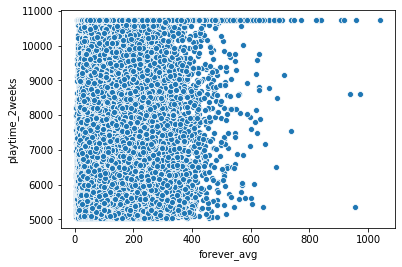

In [0]:
sns.scatterplot('forever_avg','playtime_2weeks',data=data) #Looks evenly distributed

## Correlation Heatmap

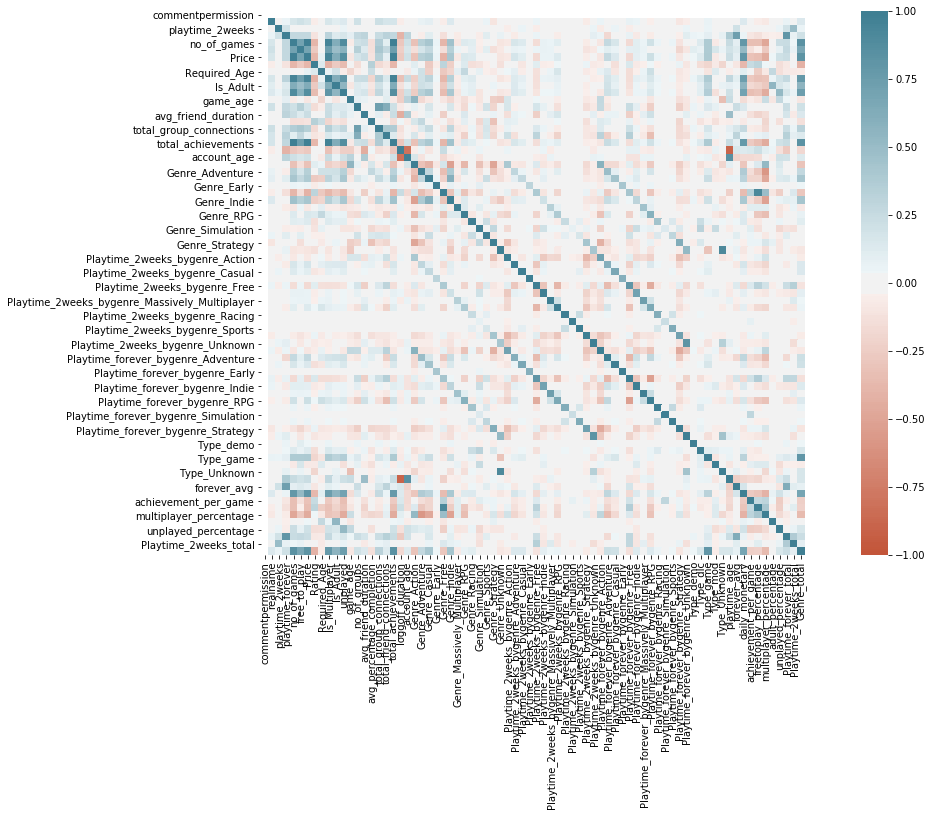

In [0]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.drop('steamid',axis=1).corr(),vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [0]:
corr = data.drop('steamid',axis=1).corr()
corr.head()

#float(corr.loc[['loggoff_duration'],['account_age']].values)

list = {}

for col1 in corr.columns:
  for col2 in corr.columns:
    value = float(corr.loc[[col1],[col2]].values)
    if value!=1:
      if value>0.5 or value<-0.5:
        list.update({col1:col2})

In [0]:
corr.loc[['account_age'],['loggoff_duration']] #-0.83
#Looks like the older the account the recent the usage

,loggoff_duration
account_age,-0.815854


## Write for Clustering

In [0]:
data.isna().sum()

steamid                                           0
commentpermission                                 0
realname                                          0
playtime_2weeks                                   0
playtime_forever                                  0
no_of_games                                       0
free_to_play                                      0
Price                                             0
Rating                                            0
Required_Age                                      0
Is_Multiplayer                                    0
Is_Adult                                          0
unplayed                                          0
game_age                                          0
no_of_groups                                      0
avg_friend_duration                               0
avg_percentage_completion                         0
total_group_connections                           0
total_friend_connections                          0
total_achiev

In [0]:
data.drop(['timecreated','dateretrieved'],axis=1).to_csv(data_loc,index=False)

# Others

In [0]:
columns_list = data.columns.values

Genre_columns = []
for x in columns_list:
  if 'Genre' in x:
    Genre_columns.append(x)

Playtime_2weeks_bygenre_columns = []
for x in columns_list:
  if 'Playtime_2weeks_bygenre' in x:
    Playtime_2weeks_bygenre_columns.append(x)

Playtime_forever_bygenre_columns = []
for x in columns_list:
  if 'Playtime_forever_bygenre' in x:
    Playtime_forever_bygenre_columns.append(x)

basic_list = []

for x in columns_list:
  if x not in ['steamid'] + Genre_columns + Playtime_2weeks_bygenre_columns + Playtime_forever_bygenre_columns:
    basic_list.append(x)

genre_list = Genre_columns

twoweek_list = Playtime_2weeks_bygenre_columns   

forever_list = Playtime_forever_bygenre_columns               

#basic_list #23
#len(genre_list) #18
#len(twoweek_list) #13
#len(forever_list) #13

In [0]:
'''
k=0
for i in basic_list:
    k=k+1
    plt.figure()
    sns.distplot(data[i])
    
'''

'\nk=0\nfor i in basic_list:\n    k=k+1\n    plt.figure()\n    sns.distplot(data[i])\n    \n'

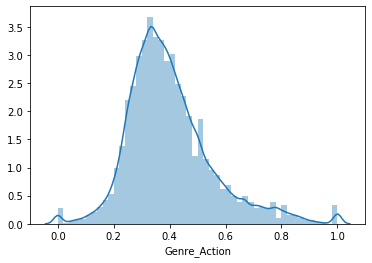

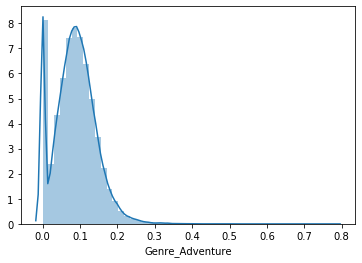

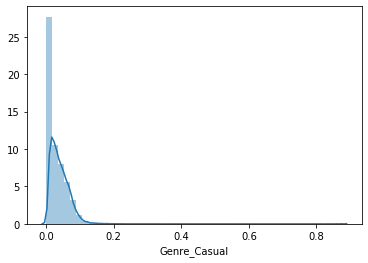

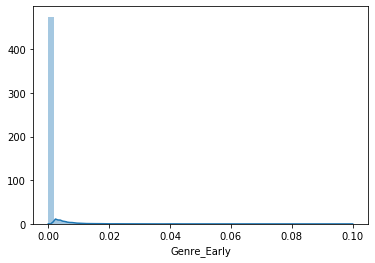

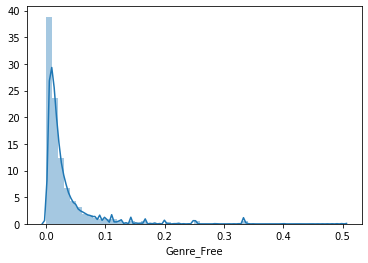

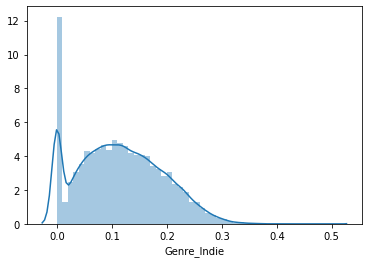

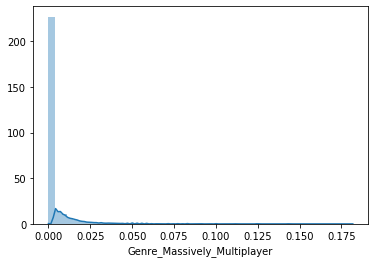

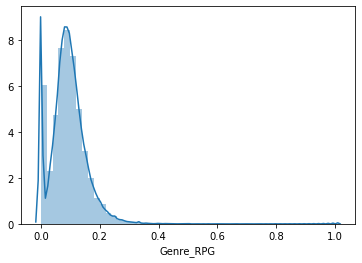

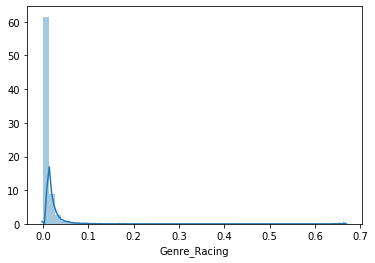

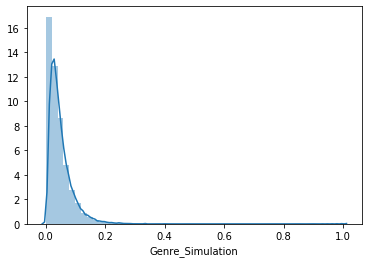

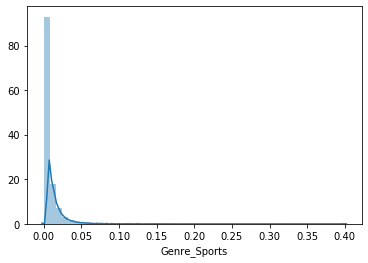

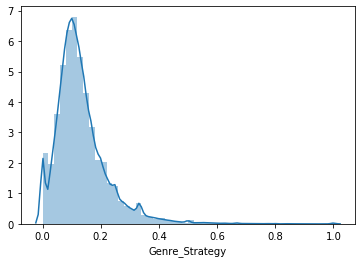

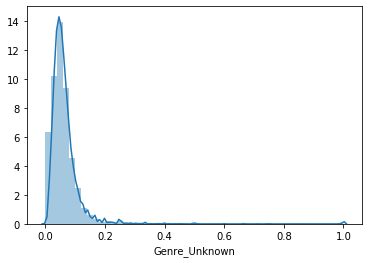

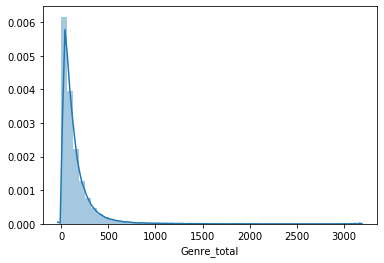

In [0]:
k=0
for i in genre_list:
    k=k+1
    plt.figure()
    sns.distplot(data[i])

In [0]:
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,timecreated,dateretrieved,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,2009-01-01,2013-05-06 15:59:30,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,2009-01-01,2013-05-06 15:13:09,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,2009-01-01,2013-05-06 15:13:30,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863